In [218]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
import tutorial_tools as tools

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

from importlib import reload

# K Nearest Neighbors 

K-Nearest Neighbors, or KNN is an algorithm widely used for classification.  There are more accurate models out there, but is implemented with relative ease, it is efficient, and the model itself is easy to interpret. 
<br> 

KNN, just as the name implies, classifies data by measuring its distance from K other points in feature space, and counting how many of each class are present.  The sample point is then classified by into the bin with the highest count. 

For example, let us stay in 2-Dimensional space, (x, y), and use the following as the training data:

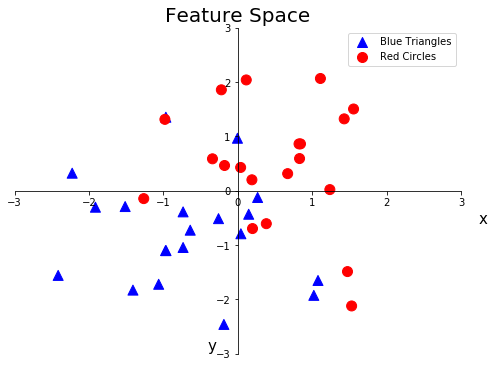

In [135]:
tools.knn_example()

In this made up data, we have two groups : **red circles** and **blue triangles**.  Although there are outliers, you can see that red circles are mostly concentrated in the 1st quadrant, and the blue triangles are mostly in the 3rd quadrant.  It stands to reason that if a new data point is introduced, and with coordinates (2,2), we should classify it as a red circle.  Conversly, if it has coordinates (-2,-2), it would be a blue triangle.  But if it is at the origin?  <br>
<br>
As stated, when using K-Nearest-Neighbors, we simply count $K$ points that are closest to the new datum, and categorize it in the group with the highest count.  <br>
<br>
Repetition is key, so one more time : 

1) Get the $K$ closest neighbors from new data point<br>
2) Count how many are in each group <br>

3) Using our example : 
- If there are more red circles : new data => red circle<br>
- If there are more blue triangles : new data => blue triangle. <br>

Now let's add a point at (0, 0), and to illustrate what we are doing : 

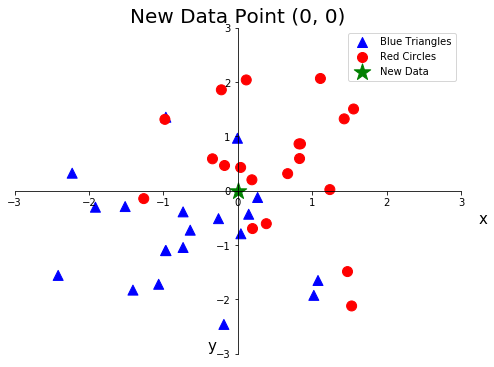

In [136]:
tools.knn_example(new_data=True)

## Python Implementation 

Now that we have a basic idea of what KNN does, lets implement a version of it with basic python to find which category the new data should be a part of.<br> 
<br>
In two dimensions, we can calculate the distance, $D$, between two points $A$ and $B$ using Pythagorean's Theorem: 

$$
    D_{ab} = \sqrt{(x_a - x_b)^2 + (y_a - y_b)^2}
$$

(known as **Euclidean Distance**).  Which can be generalized to $N$ dimensions using vector notation : 

$$
D_{ab} = \sqrt{(\mathbf{a} - \mathbf{b})\cdot(\mathbf{a} - \mathbf{b})}
$$
<br>
<br>
We can start by defining a function that will return the distance of two points, we could restrict ourselves to 
two dimesions, but for the sake of generality, let's make it for any dimensions.  The input of this function will be two vectors/set of coordinates in N dimensions. 

In [137]:
def get_distance(v1, v2):
    return np.sqrt((v1 - v2).dot(v1 - v2))

In [138]:
# Get made up data, return blues and reds, each is a numpy array with x and y paired up. 
blues, reds = tools.knn_example(return_data=True)

With our data, and our distance function in hand, we can loop over each point and get its distance from the origin (since that is where we placed our new data). 

In [139]:
# Get Number of Blue and red points
N_blue = len(blues)
N_red  = len(reds)

# Initialize arrays to hold distances for red and blue (set all at zero)
distance_blue = np.zeros(N_blue)
distance_red = np.zeros(N_red)

# Explicitly define our new data point
new_data = np.array([0,0])

# Loop over blue triangle points, and calculate distance from new_data, save into distance_blue array
for i in range(N_blue):
    distance_blue[i] = get_distance(new_data, blues[i])

# Loop over red_circle points, and calculate distance from new_data, save into distance_red array. 
for i in range(N_red):
    distance_red[i] = get_distance(new_data, reds[i])

Now that we have the distances we just have to get the ones that are closest to the new data, and count how many blues and how many reds. For the sake of presentation, we can put this into a pandas data frame to get a better idea.  So let's combine blues and reds, and add a label, then we can sort it by distance, and see what comes up: 

In [140]:
# Combine data from each category
distances = np.concatenate([distance_red, distance_blue])
xs = np.concatenate([reds[:,0], blues[:,0]])
ys = np.concatenate([reds[:,1], blues[:,1]])

# Create labels
labels = ['red' for i in range(N_red)]
labels.extend(['blue' for i in range(N_blue)])

# Create Data Frame Of x, y coordinates, distances from new_data, and labels (blue red)
# and sort to see the closest points. 
# Note this is not an efficient method, it is just for presentation.  
dataframe = pd.DataFrame({'x':xs, 'y':ys, 'distance':distances, 'labels':labels})
dataframe.sort_values(by='distance').head(5)

,distance,labels,x,y
17,0.277124,red,0.190788,0.200993
27,0.294911,blue,0.267435,-0.124302
6,0.429796,red,0.039361,0.427990
22,0.456994,blue,0.147689,-0.432472
12,0.496748,red,-0.176922,0.464174


We can also illustrate this on a plot (notice we zoomed in on the center) : 

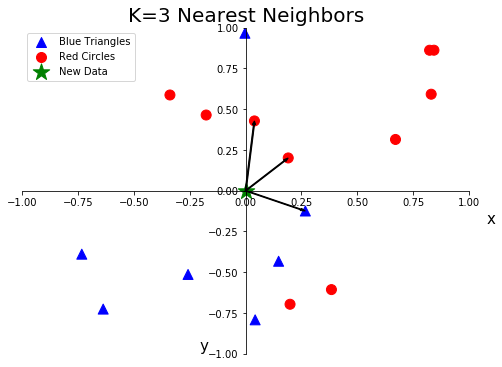

In [141]:
tools.knn_example(new_data=True, vectors=True)

From our sorted dataframe, or the plot we can see that the 3 closest points are : **red, blue, red**. So by simply counting: we have 2 reds, and 1 blue so the new data point will be classified as red!

## Decision Boundaries

To visualize how new data would be categorized, we can draw a decision boundary that color codes which bin each point in the feature space will be classified as.  Of course, this only works if we are only dealing with two dimensions, but it gives an idea of how our choice of K can affect the decision. 

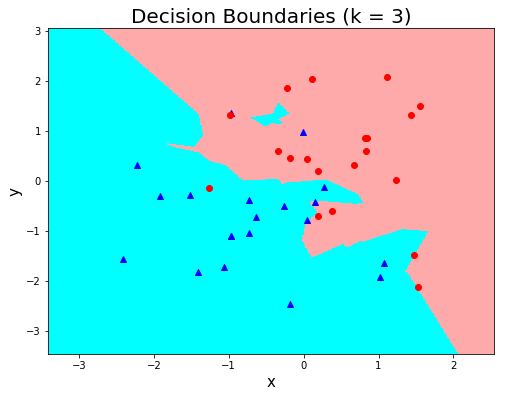

In [183]:
tools.knn_boundaries(K=3)

The Boundaries confirm that the upper right of the space would be categorized as red, the bottom left as blue, and that the decision can be a bit messy in the middle.  We also notice the outliers. 

## Varying $K$

KNN requires us to make an appropriate decision for $K$.  That is : *how many neighbors should we count to get the best fit for our data?*
<br>
<br>
To visualize this, the effect of our choice we can use the decision boundaries plotted above, and vary $K$ : 

### $K = 1$

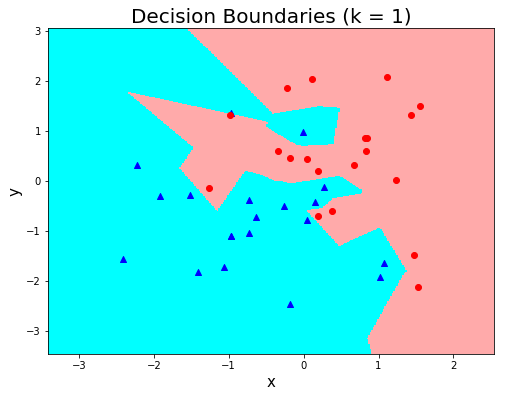

In [186]:
tools.knn_boundaries(1)

If $K = 1$ we are simply looking at the nearest neighbor and categorizing as such.  This might work well when training our data, but it is very likely to overfit, misclassifying new data as it comes in. 

### $K = [5, 10, 20]$

Now let's see how the boundaries change as we increase K: 

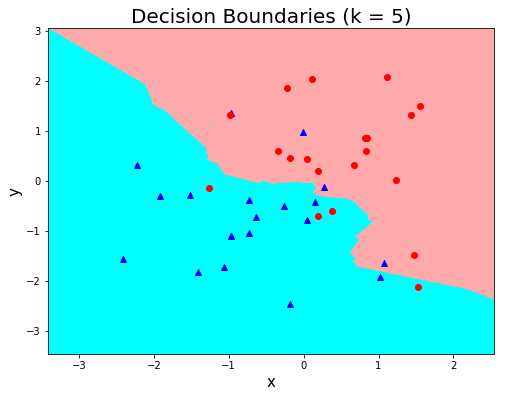

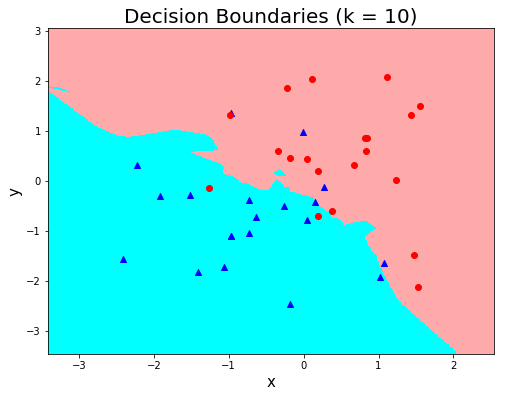

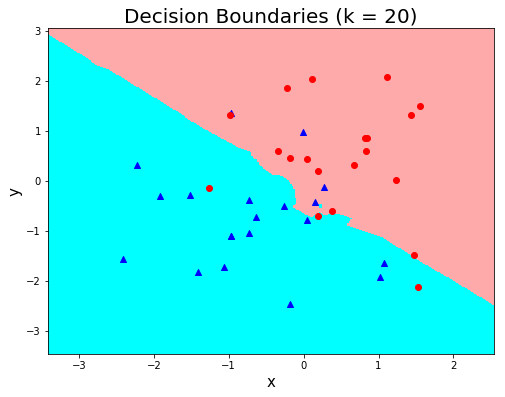

In [187]:
K = [5, 10, 20]

for k in K:
    tools.knn_boundaries(k)

As $K$ increases, we can see the boundaries become smoother.  This may look better in the plots, but you'll notice that as it gets larger, more points are getting misclassified.  Contrary to when $K=1$ as it gets too large, we are introducing more and more bias in our model.

### $K \rightarrow \infty$

Finally, we look at what happens when $K$ goes to infinity.  This isn't technically possible, but I know that we have a total of 40 points in our data.  So we can set $K=40$ : 

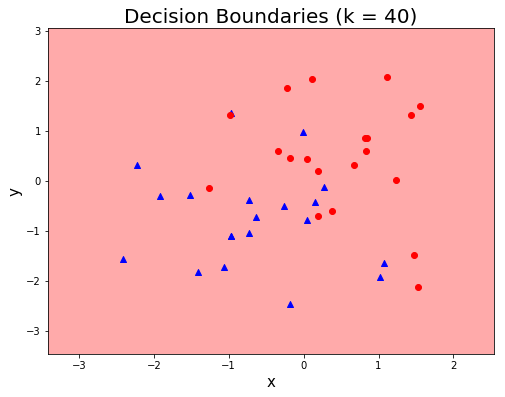

In [188]:
tools.knn_boundaries(40)

Essentially, if we pick as many neighbors as there are points, the highest count will always be the category that occurs most in the dataset.  This is a bad model. <br>
<br>
*NOTE: you might have noticed that there are as many blue triangles as there are red circles, so the decision is likely a technicality of the implementation (these plots use sklearn to get the nearest neighbors).*

### Recap on the Choice of $K$: 

Choosing the right number of neighbors to count can be subjective.  In the end the "correct" choice will depend on your data.  It will one that does not overfit on the training set by not picking a $K$ that is too small, and not have too much bias, meaning $K$ will not be too large.  It is up to you to test out which one generalizes best. 

## SciKit Learn Implementation

I like to do the a simple implementation using basic python so that you can get a decent idea of the method, and how it works under the hood.  Fortunately though, SciKit Learn already has a K-Nearest-Neighbor implementation, that will be much more efficient that the one above, and will be able to handle any number of categories.  So let's take a look at how that works, and the different parameters it has to offer.<br>
<br>
For this we will be using a new dataset, from here : 
https://archive.ics.uci.edu/ml/machine-learning-databases/glass/

This is data set of different types of glass from USA Forensic Science Service.  The different features are : 
<br>
<br>
1) ID : just a row number, we will drop this. <br>
2) RI : refractive index (measure of how much light is bent as it shines through). <br>
3) Different weight percentages corresponding to 8 different elements : Na, Mg, Al, Si, K, Ca, Ba, and Fe (in that order)<br>
4) Different numbers correponding to a certain type of glass (this what we will be categorizing) : <br>
- 1: building_windows_float_processed 
- 2: building_windows_non_float_processed 
- 3: vehicle_windows_float_processed 
- 4: vehicle_windows_non_float_processed (none in this database) 
- 5: containers 
- 6: tableware 
- 7: headlamps

Without further ado, let's import our data : 

In [197]:
data = pd.read_csv('datasets/glass.csv', header=None).drop(0, axis=1)
data.columns = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'glass_type']

In [198]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


We should do a little exploratory data analysis to get a feel for what we are looking at, and get an idea of which features might be correlated, but I will do this quick and dirty since I am focusing on using SciKit Learn's KNN.
<br>
<br>
So let's start by separating X, and y, and doing our usual train test split. 

In [214]:
# Separate data into X, and y
X = data.drop('glass_type', axis=1)
y = data.glass_type

# Train Test Split : 
X_train, X_test, y_train, y_test = train_test_split(X, y)

From here we define SciKit learn's KNeighborsClassifier object.  Note that we can also use KNN for regression, but that is for another time. 
<br>
<br>
When defining it there are number of parameters you can pass, but let's start simple, and only pass the number of neighbors. 

In [215]:
# Define KNN object, set N neighbors to 3
KNN = KNeighborsClassifier(n_neighbors=3)

Now we can fit the model, as usual with SciKit learn it is as simple as : 

In [216]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Fitting the KNN classifier is effectively the same as drawing (continuous) decision boundaries.  If I am not mistaken it will calculate distances exactly when introduced to new data.  But let's see how our predictions fair : 

In [217]:
train_predictions = KNN.predict(X_train)
test_predictions = KNN.predict(X_test)

When doing classification we can look at the accuracy (number correctly classified / total number), but this can be misleading.  For example, we have 99 red circles, and 1 blue triangle and classify all 100 points as red circles we will get an accuracy of 99%, but our model didn't really do anything.  It is better to look at the confusion matrix : 

In [220]:
print('Training Results, acc={}'.format(KNN.score(X_train, y_train)))
print(confusion_matrix(y_train, train_predictions))
print('')
print('Testing Results, acc={}'.format(KNN.score(X_test, y_test)))
print(confusion_matrix(y_test, test_predictions))

Training Results, acc=0.7875
[[53  3  2  0  0  0]
 [ 9 42  0  0  2  0]
 [ 9  0  3  0  0  0]
 [ 0  2  0  6  0  0]
 [ 0  3  0  0  4  0]
 [ 1  3  0  0  0 18]]

Testing Results, acc=0.6666666666666666
[[11  1  0  0  0  0]
 [ 7 15  0  0  1  0]
 [ 2  0  3  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 2  0  0  0  1  4]]


Looking at the confusion matrix, ideally we would want everything to be on the diagonal.  So we can see that there are some that there is a number of glasses that are being misclassified, we may need to adjust $K$.
<br>
<br>
So lets loop over a few to see if anything gives us something better :  

In [229]:
for k in [1, 2, 5, 10, 30]:
    print('K = ', k)
    print('--------')
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    print('Training Results, acc={}'.format(round(model.score(X_train, y_train), 3)))
    print(confusion_matrix(y_train, train_predictions))
    print('')
    print('Testing Results, acc={}'.format(round(model.score(X_test, y_test), 3)))
    print(confusion_matrix(y_test, test_predictions))
    print('\n\n')

K =  1
--------
Training Results, acc=1.0
[[58  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 22]]

Testing Results, acc=0.815
[[10  1  1  0  0  0]
 [ 3 19  1  0  0  0]
 [ 2  0  3  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  6]]



K =  2
--------
Training Results, acc=0.812
[[58  0  0  0  0  0]
 [13 40  0  0  0  0]
 [10  0  2  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  1  0  1  5  0]
 [ 0  1  1  2  0 18]]

Testing Results, acc=0.63
[[12  0  0  0  0  0]
 [10 13  0  0  0  0]
 [ 3  0  2  0  0  0]
 [ 0  3  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  1  0  0  2  4]]



K =  5
--------
Training Results, acc=0.744
[[50  6  2  0  0  0]
 [10 40  0  2  1  0]
 [ 8  1  3  0  0  0]
 [ 0  0  0  5  1  2]
 [ 0  2  0  1  3  1]
 [ 1  2  0  1  0 18]]

Testing Results, acc=0.611
[[10  1  1  0  0  0]
 [ 7 15  0  0  1  0]
 [ 5  0  0  0  0  0]
 [ 0  2  0  2  0  1]
 [ 0  0  0  0  2  0]
 [ 2  0  0  0  1  4]]



K =  10
--------

We see here that the accuracy significantly drops after $K=1$.  The results aren't perfect, but it seems we won't be doing any better using this method.  Note that we previously said taht $K=1$ is likely to overfit the data.  This is generally true, but it seems that in the case of glass, the features are all tightly packed in feature space, so it works well.  That is probably because different types of glass are made in specific ways, so there is little variability in their content. 

### Other Parameters : 

We have seent he effects of the main parameter of KNN... $K$.  But let's go over a few others to see what scikit-learn has to offer.  If you would like to get all the details, I highly encourage reading the documentation : http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
<br>
<br>

### Weights : 

This parameter allows us to use a variation of KNN.  The options are :<br>
- 'uniform'
- 'distance'
- 'callable'
<br>

'uniform' is the default.  The algorithm does exactly as we have explained it up until now.  <br>
<br>
'distance' allows you let closer points have a greater influence on the results. Each point is weigthed by the inverse of its distance. So instead of simply counting the number of each category, we are summing the weights.  For example if we pick $K=3$, and have the following nearest neighbors : 
<br>
- 'red' : 1.1 units away
- 'blue' : 0.4 units away 
- 'red' : 0.9 units away <br>

'uniform' weights would give you the result : 2 reds, 1 blue => classify as red.  Where as 'distance' will give you : 
<br>
<br>
$\text{blue} = \frac{1}{0.4} = 2.5$
<br>
<br>
$\text{red} = \frac{1}{1.1} + \frac{1}{0.9} = 2.02$
<br>
<br>
So the contribution of the single blue point is higher than that of both red ones.  The new data would be classified as blue.
<br>
<br>
Since it seems that the points in the glass dataset are tightly packed, let's see if this parameter has an effect on the results.  We simply repeat the loop above but specifty the *weights='distance'* parameter. 

In [236]:
for k in [1, 2, 5, 10, 30]:
    print('K = ', k)
    print('--------')
    model = KNeighborsClassifier(n_neighbors=k, weights='distance')
    model.fit(X_train, y_train)
    
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    
    print('Training Results, acc={}'.format(round(model.score(X_train, y_train), 3)))
    print(confusion_matrix(y_train, train_predictions))
    print('')
    print('Testing Results, acc={}'.format(round(model.score(X_test, y_test), 3)))
    print(confusion_matrix(y_test, test_predictions))
    print('\n\n')

K =  1
--------
Training Results, acc=1.0
[[58  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 22]]

Testing Results, acc=0.815
[[10  1  1  0  0  0]
 [ 3 19  1  0  0  0]
 [ 2  0  3  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  6]]



K =  2
--------
Training Results, acc=1.0
[[58  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 22]]

Testing Results, acc=0.815
[[10  1  1  0  0  0]
 [ 3 19  1  0  0  0]
 [ 2  0  3  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  1  6]]



K =  5
--------
Training Results, acc=1.0
[[58  0  0  0  0  0]
 [ 0 53  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0  7  0]
 [ 0  0  0  0  0 22]]

Testing Results, acc=0.704
[[10  1  1  0  0  0]
 [ 6 16  0  0  1  0]
 [ 3  0  2  0  0  0]
 [ 0  1  0  4  0  0]
 [ 0  0  0  0  2  0]
 [ 1  1  0  0  1  4]]



K =  10
--------
Tr

Notice that when $K=1$ we get the same result.  This makes sense.  Results are exactly the same when $K=2$.  And the model keeps doing worse after that.  Well it was worth a shot!
<br>

## Final Thoughts 

This concludes our tutorial on K-Nearest-Neighbors, there are other parameters we can play with, but this gives us the main points of the algorithm.  Again, it is simple to understand, and generally efficient, but it does not perform that well.  Classification